# K Nearest Neighbors

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WTT,1000.0,0.949682,0.289635,0.174412,0.742358,0.940475,1.163295,1.721779
PTI,1000.0,1.114303,0.257085,0.441398,0.942071,1.118486,1.307904,1.833757
EQW,1000.0,0.834127,0.291554,0.170924,0.615451,0.813264,1.028340,1.722725
SBI,1000.0,0.682099,0.229645,0.045027,0.515010,0.676835,0.834317,1.634884
LQE,1000.0,1.032336,0.243413,0.315307,0.870855,1.035824,1.198270,1.650050
QWG,1000.0,0.943534,0.256121,0.262389,0.761064,0.941502,1.123060,1.666902
FDJ,1000.0,0.963422,0.255118,0.295228,0.784407,0.945333,1.134852,1.713342
PJF,1000.0,1.071960,0.288982,0.299476,0.866306,1.065500,1.283156,1.785420
HQE,1000.0,1.158251,0.293738,0.365157,0.934340,1.165556,1.383173,1.885690
NXJ,1000.0,1.362725,0.204225,0.639693,1.222623,1.375368,1.504832,1.893950


# Standardize the Variables

**IMPORTANT:**

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))

In [9]:
scaled_features[:5]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137,  0.75587279,  2.03169299,
        -0.87015616,  2.59981844,  0.28570652, -0.68249379, -0.37784986],
       [ 0.9828405 ,  1.06019327, -0.62139875,  0.62529938,  0.45282034,
        -0.26722041,  1.75020756,  1.06649052,  1.24132463, -1.02698711],
       [ 1.13927548, -0.64039191, -0.70981864, -0.05717457,  0.82288616,
        -0.93677314,  0.59678173, -1.47235164,  1.04077225,  0.2765098 ]])

In [10]:
type(scaled_features)

numpy.ndarray

In [11]:
# re-create features dataframe, column name is without TARGET CLASS
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [12]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['TARGET CLASS']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700,), (300,))

# Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

In [20]:
predictions = knn.predict(X_test)

In [21]:
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



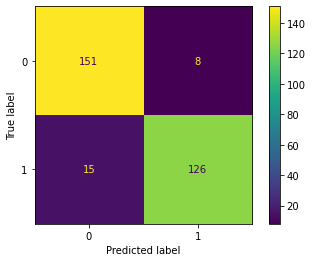

In [24]:
plot_confusion_matrix(knn, X_test, y_test);

# Choosing a K Value (uisng Elbow method)

Let's go ahead and use the elbow method to pick a good K Value:

In [25]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    i_pred = knn.predict(X_test)
    error_rate.append(np.mean(i_pred != y_test))

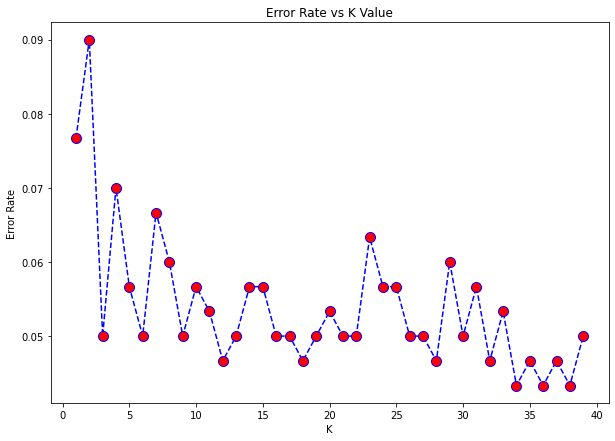

In [26]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

# Retrain the model with chosen model

In [27]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



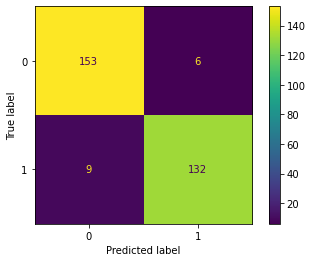

In [29]:
plot_confusion_matrix(knn, X_test, y_test);

# Using RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
knn = KNeighborsClassifier()

In [37]:
parameters = {
    'n_neighbors': range(1, 100)
}

In [44]:
cv_model = RandomizedSearchCV(knn, parameters, cv=5, random_state=101, refit=True)

In [45]:
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 100)},
                   random_state=101)

In [46]:
cv_model.best_params_

{'n_neighbors': 26}

In [47]:
cv_predictions = cv_model.predict(X_test)

In [48]:
print(classification_report(y_test, cv_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



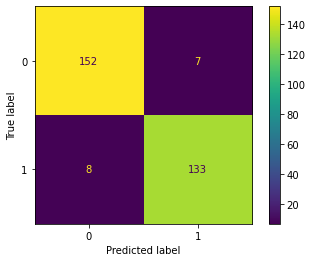

In [49]:
plot_confusion_matrix(cv_model, X_test, y_test);